In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import utilities
from optics import (
    bandLimitedAngularSpectrumMethod as BLASM,
)

import data_processor

print(torch.__version__)

2.1.2


# about the data loader

In [2]:
# convert the .exr data to torch tensors
data_processor.read_exr_in_multi_folders(
    "data\\test_192", channlesNum=3, height=192, width=192
)
data_processor.read_exr_in_multi_folders(
    "data\\test_384", channlesNum=3, height=384, width=384
)

Saved data\test_192\amp.pt
Saved data\test_192\depth.pt
Saved data\test_192\img.pt
Saved data\test_192\phs.pt
Saved data\test_384\amp.pt
Saved data\test_384\depth.pt
Saved data\test_384\img.pt
Saved data\test_384\phs.pt


In [3]:
dataset = data_processor.data_loader(
    "data\\test_192\\amp.pt",
    "data\\test_192\\phs.pt",
    "data\\test_192\\img.pt",
    "data\\test_192\\depth.pt",
    channlesNum=3,
    height=192,
    width=192,
)

dataLoader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True, num_workers=0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


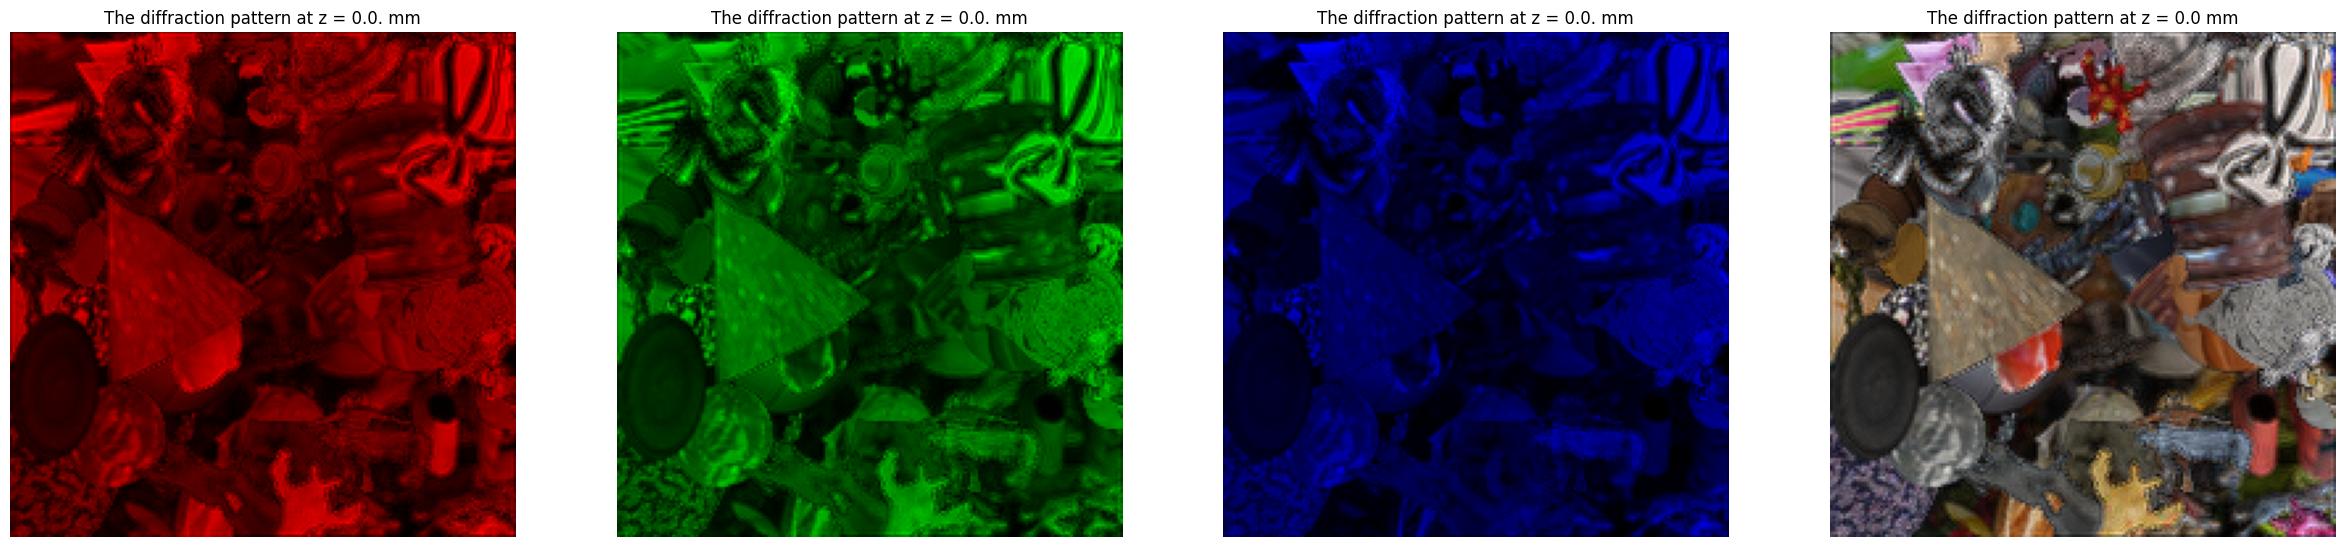

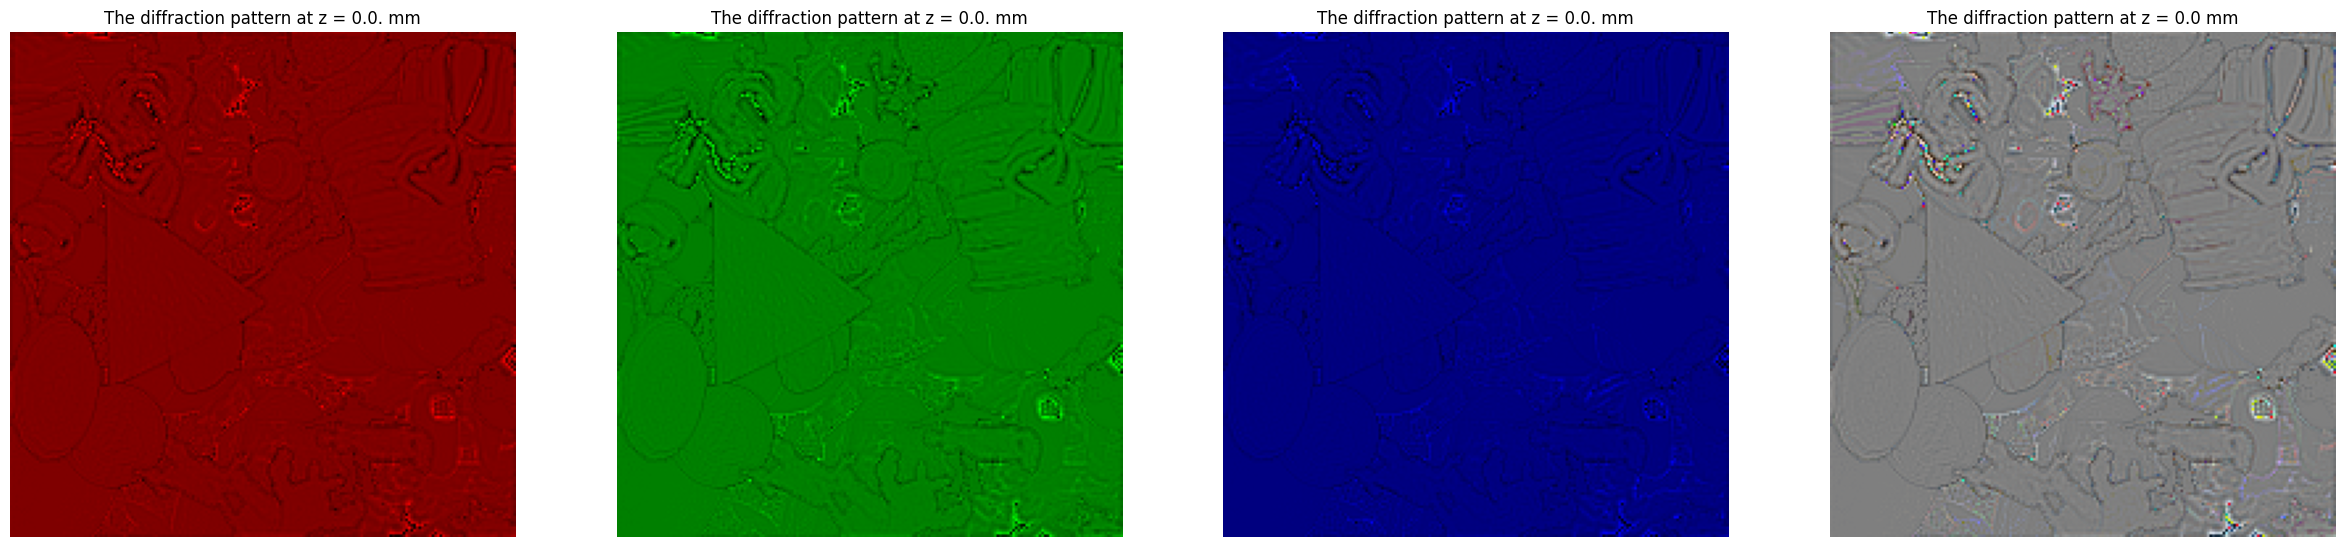

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


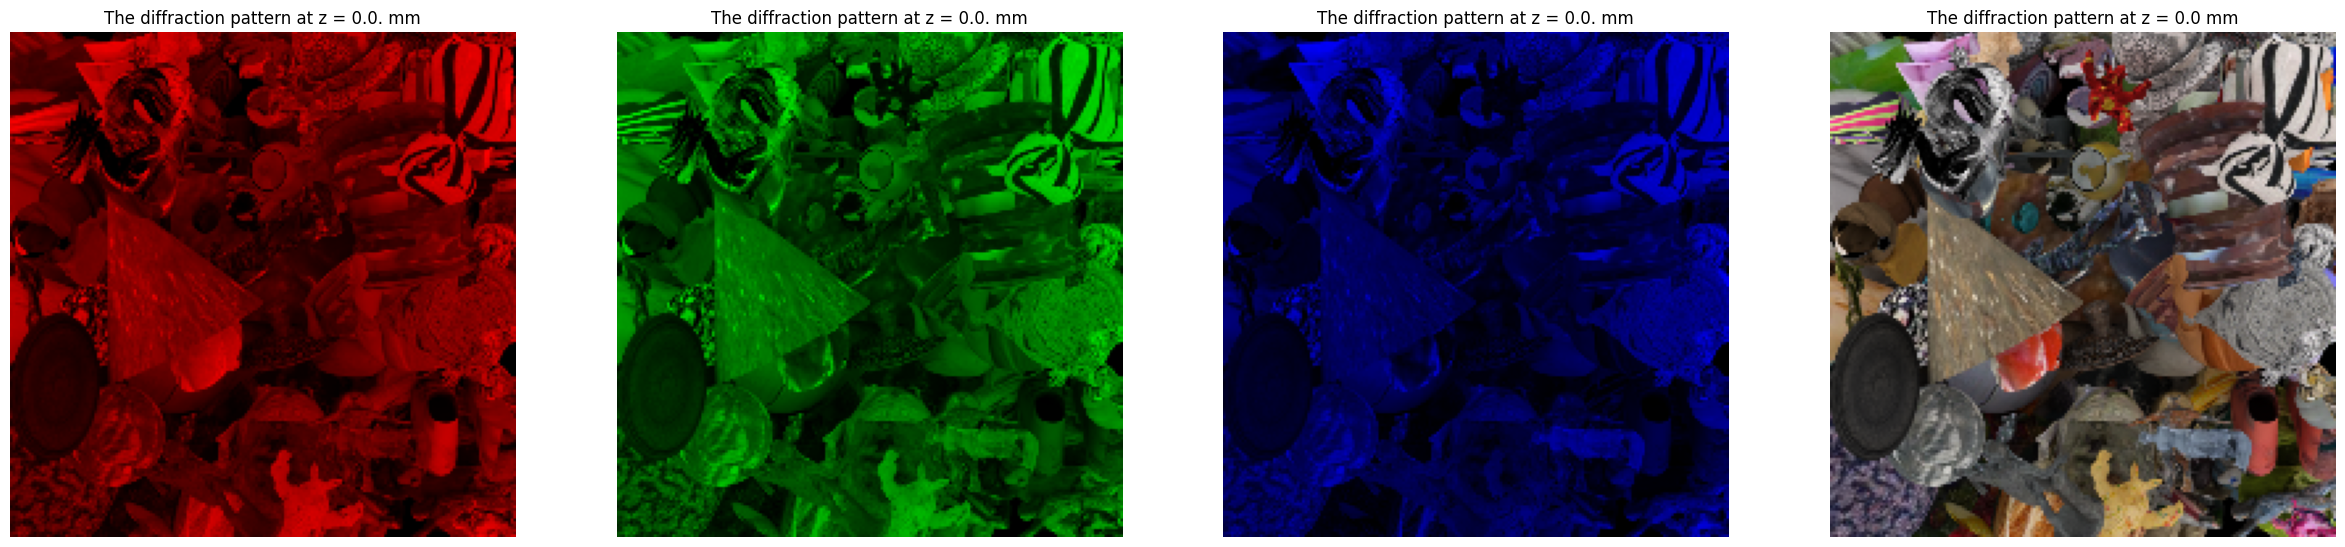

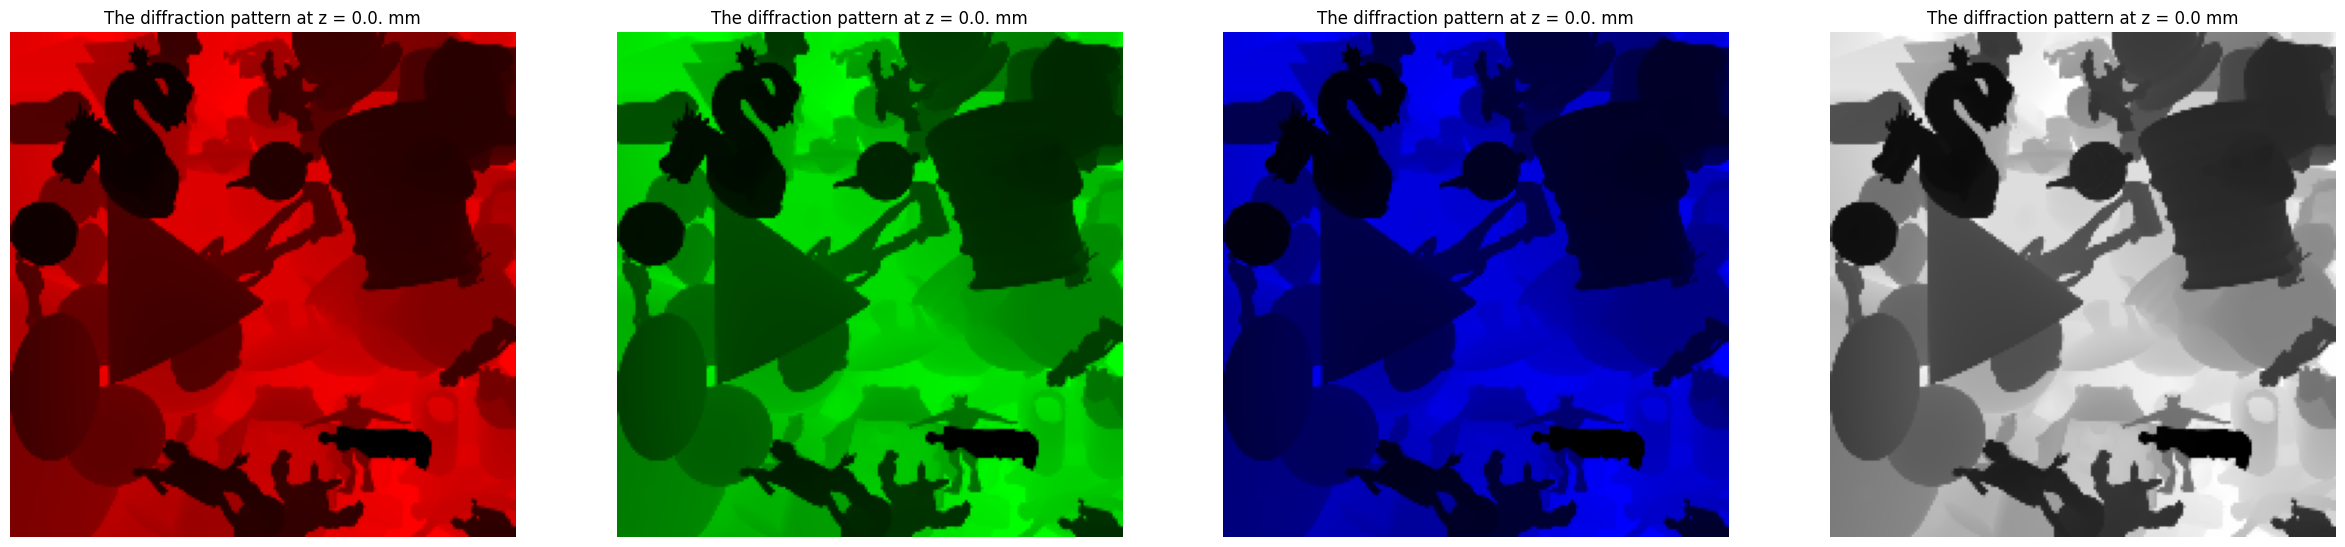

In [4]:
amp, phs, img, depth = next(iter(dataLoader))
utilities.multi_channel_plotter(amp, torch.tensor(0.0), rgb_img=True)
utilities.multi_channel_plotter(phs, torch.tensor(0.0), rgb_img=True)
utilities.multi_channel_plotter(img, torch.tensor(0.0), rgb_img=True)
utilities.multi_channel_plotter(depth, torch.tensor(0.0), rgb_img=True)

In [5]:
depth_np = depth.squeeze().numpy()
print(depth_np.max(), depth_np.min())
dep = depth_np[0]
dep

0.9995117 0.0


array([[0.87841797, 0.8808594 , 0.88378906, ..., 0.8544922 , 0.88964844,
        0.93603516],
       [0.87939453, 0.88183594, 0.88427734, ..., 0.85302734, 0.8833008 ,
        0.94189453],
       [0.8808594 , 0.8828125 , 0.8852539 , ..., 0.85253906, 0.87841797,
        0.9423828 ],
       ...,
       [0.48535156, 0.48657227, 0.48779297, ..., 0.1763916 , 0.17626953,
        0.17614746],
       [0.4855957 , 0.4868164 , 0.48828125, ..., 0.17443848, 0.17590332,
        0.17578125],
       [0.48583984, 0.4873047 , 0.4885254 , ..., 0.17163086, 0.17260742,
        0.17260742]], dtype=float32)

# about band_limited_angular_spectrum_method

In [6]:
distances = torch.tensor(
    [0.0, 2.5e-2, 5.0e-3, 7.5e-3, 1.0e-2, 5.0e-2, 10.0e-2, 20.0e-3]
)
propagator = BLASM(distances=distances)
%timeit g_z_complex = propagator.band_limited_angular_spectrum_multichannels()

The slowest run took 5.15 times longer than the fastest. This could mean that an intermediate result is being cached.
6.4 s ± 5.23 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


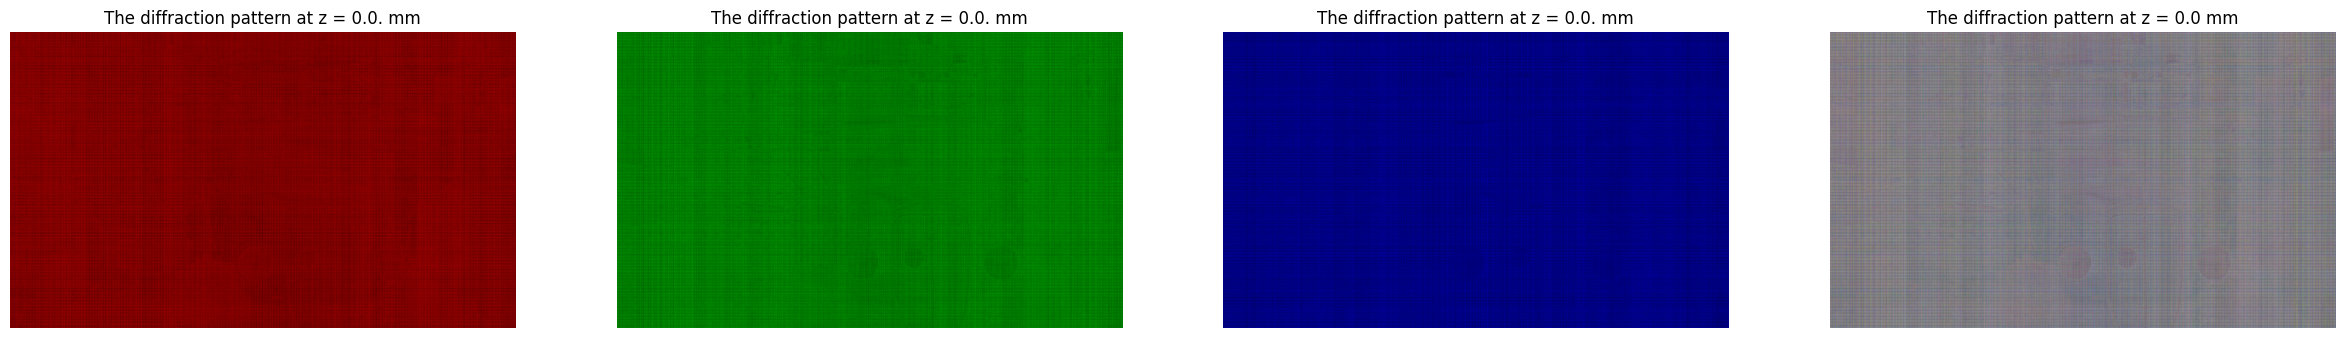

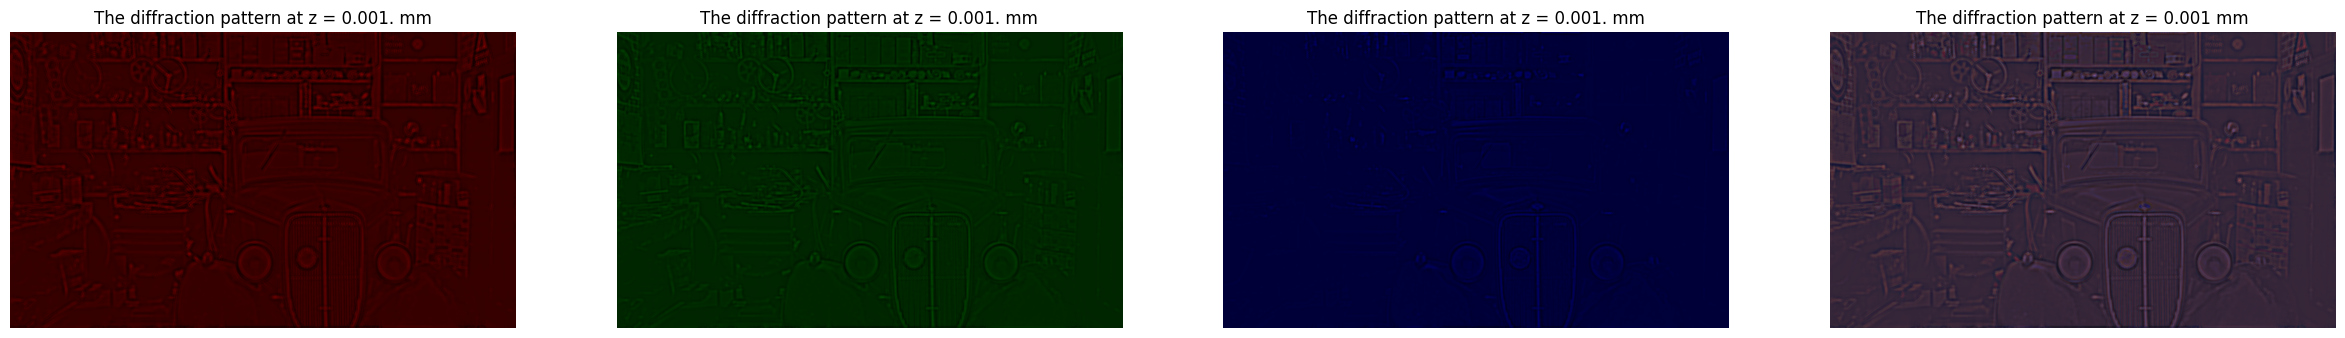

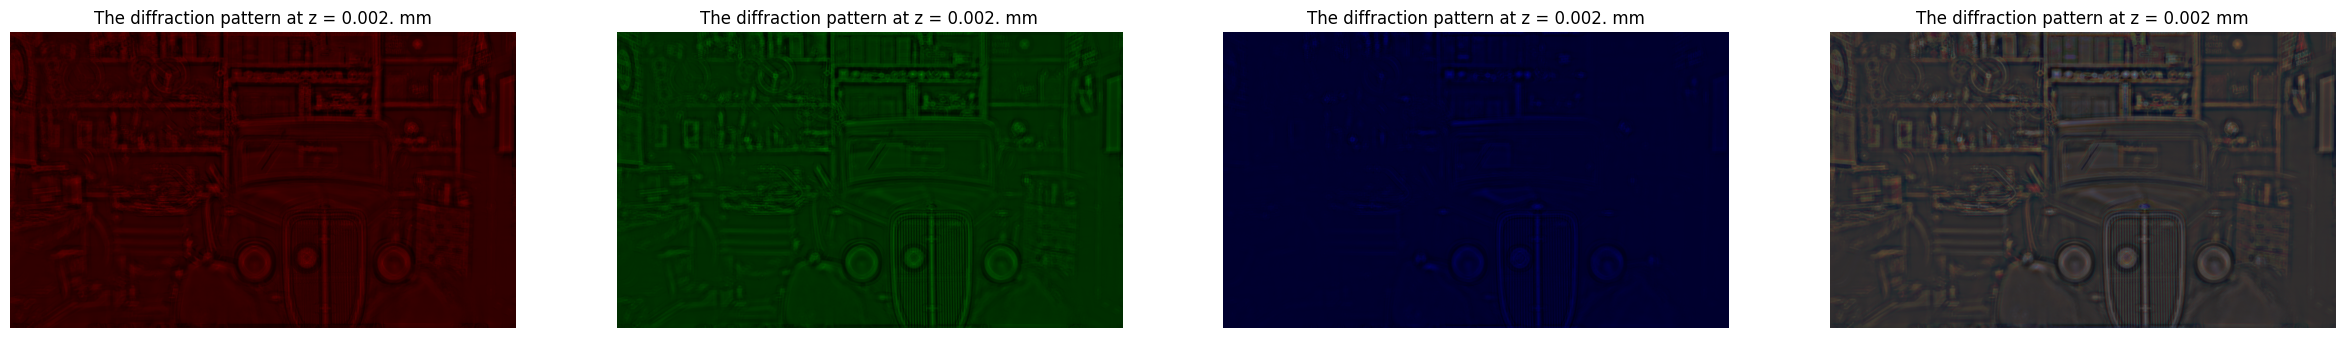

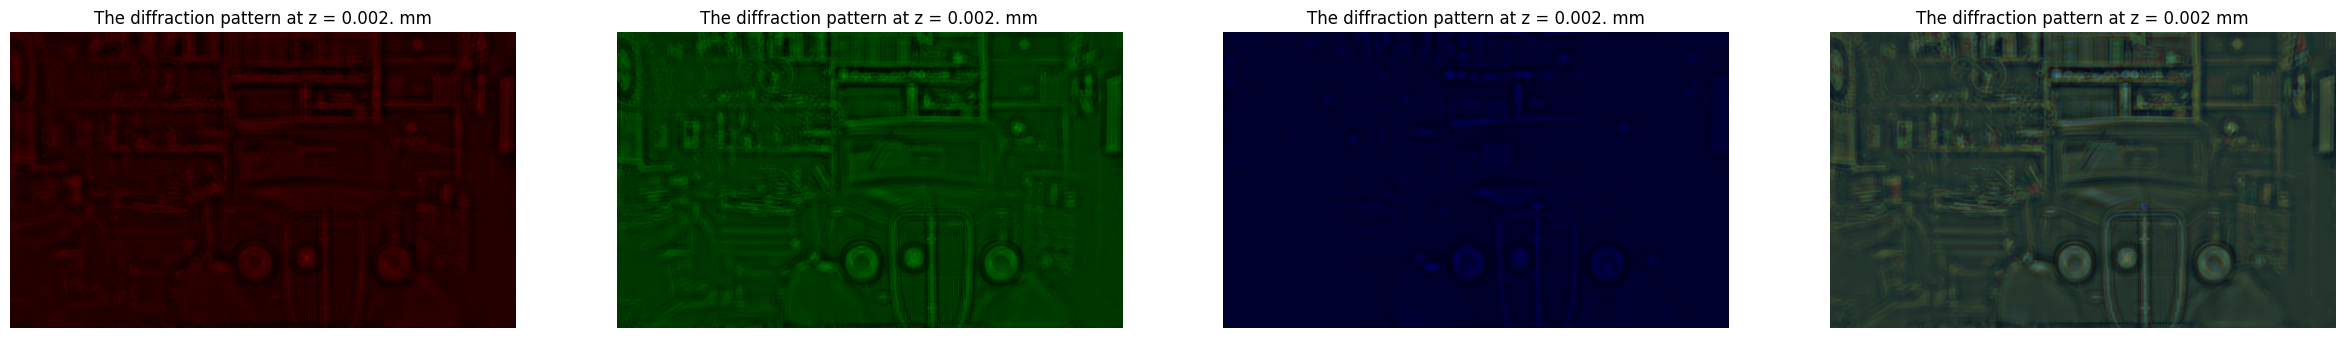

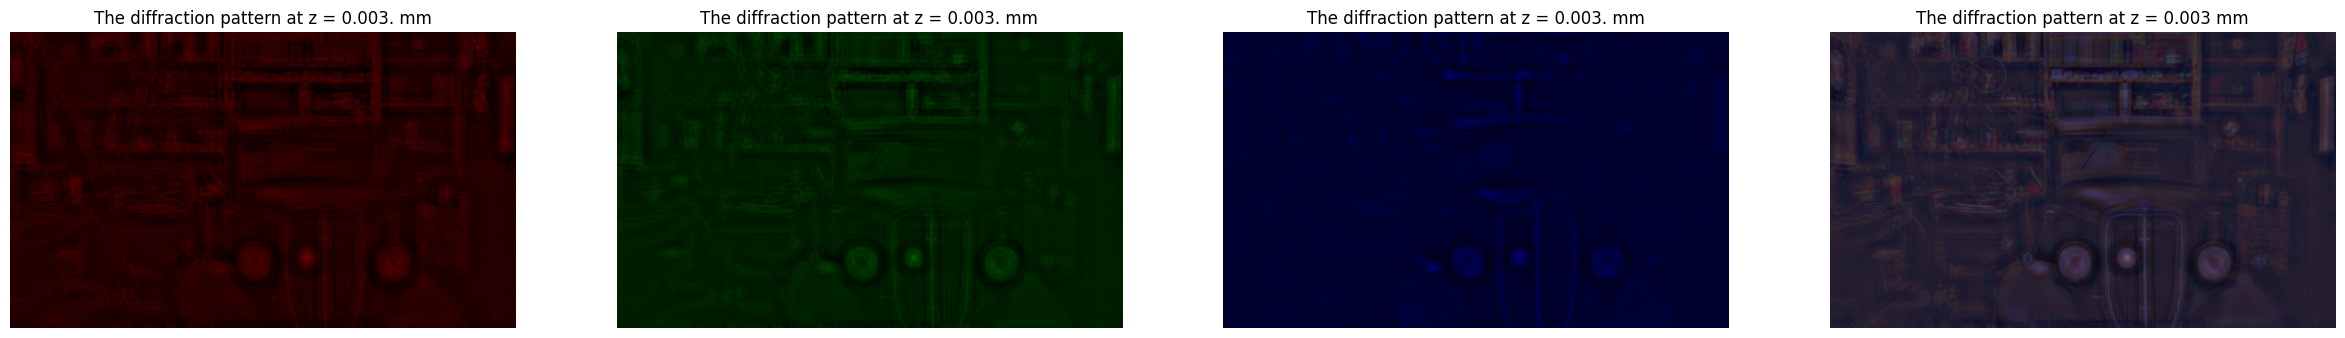

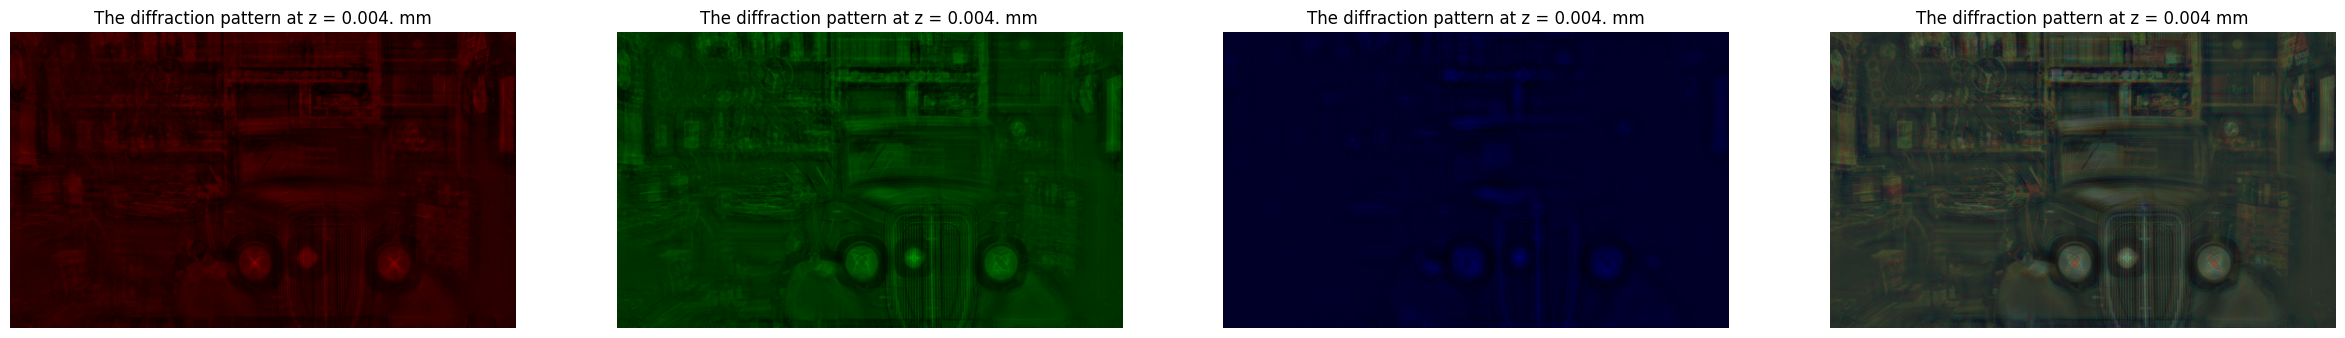

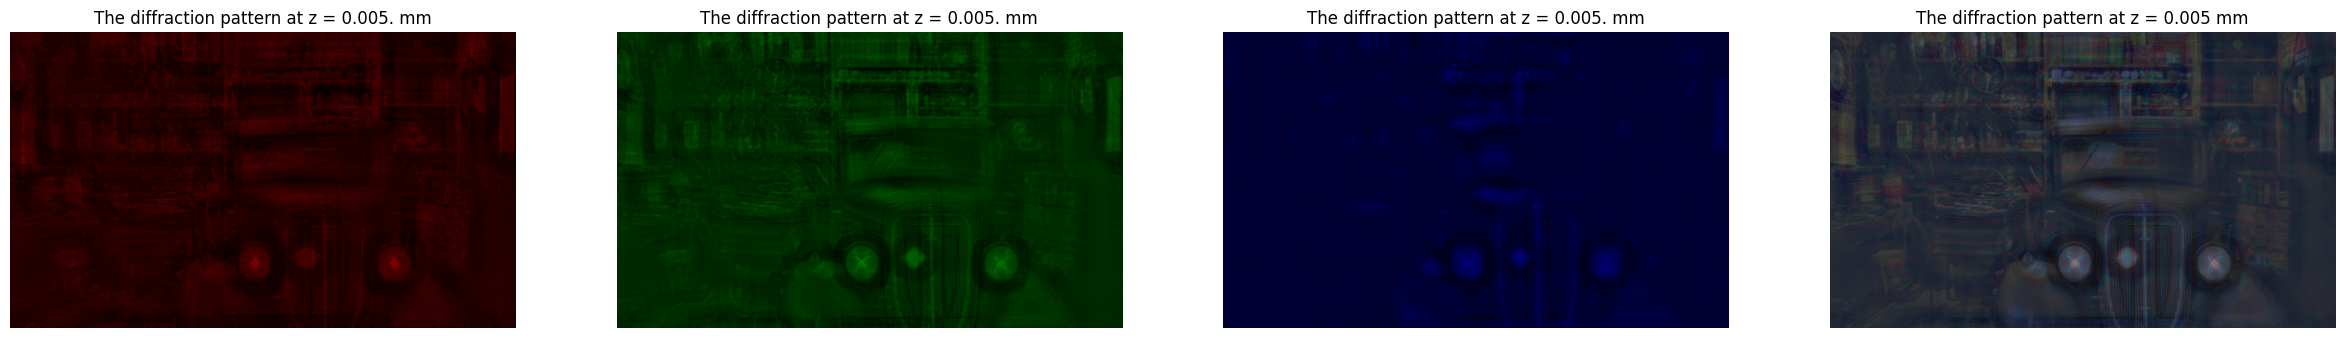

In [7]:
# clear the cache
torch.cuda.empty_cache()

distances = torch.linspace(0, 5e-3, 7)
propagator = BLASM(distances=distances,band_limit=True)
g_z_complex = propagator.band_limited_angular_spectrum_multichannels()
intensity = utilities.intensity_calculator(g_z_complex, True)
utilities.multi_depth_plotter(intensity, distances, rgb_img=True)